In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

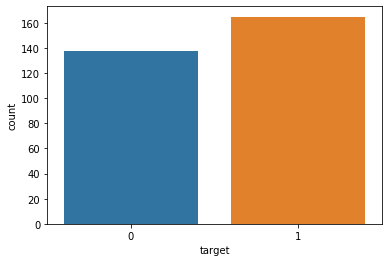

In [5]:
sns.countplot(x='target', data=df)

In [6]:
countNoDisease = len(df[df['target'] == 0])
countHaveDisease = len(df[df['target'] == 1])

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / len(df['target'])) * 100))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / len(df['target'])) * 100))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


Text(0.5, 0, 'Sex (0 = female, 1 = Male)')

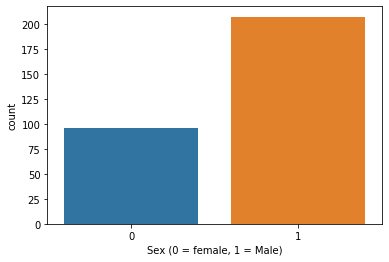

In [7]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = Male)")

In [8]:
countFemale = len(df[df['sex'] == 0])
countMale = len(df[df['sex'] == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / len(df['sex'])) * 100))
print("Percentage of Male Patients: {:.2f}%".format((countMale / len(df['sex'])) * 100))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Text(0, 0.5, 'Frequency')

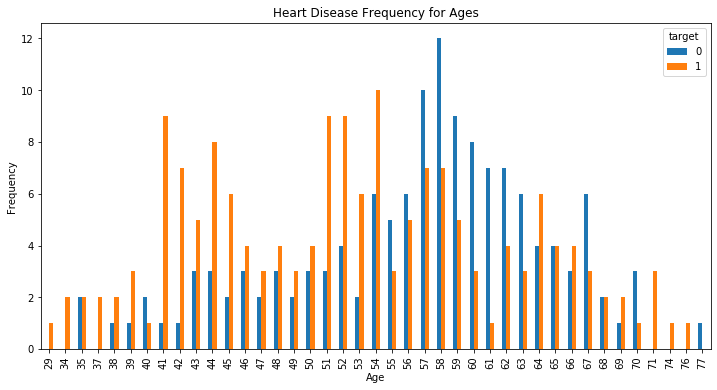

In [10]:
pd.crosstab(df['age'], df['target']).plot(kind='bar', figsize=(12,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

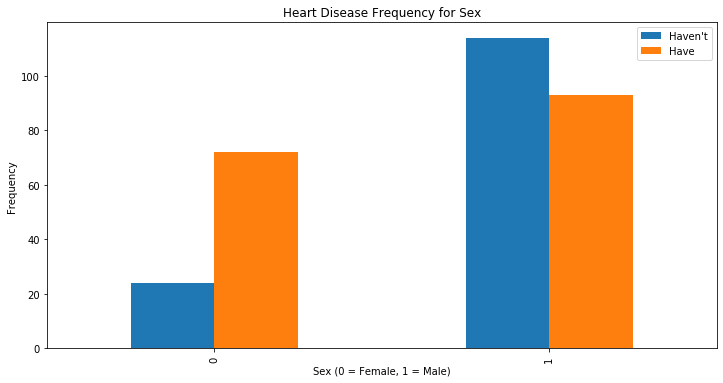

In [11]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar', figsize=(12,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't", "Have"])
plt.ylabel('Frequency')

Text(0, 0.5, 'Max Heart Rate')

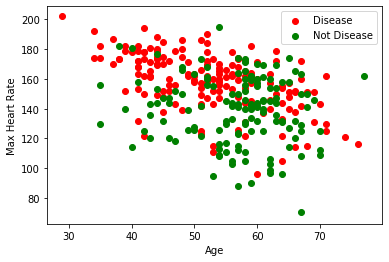

In [12]:
plt.scatter(x=df['age'][df['target'] == 1], y=df['thalach'][(df['target'] == 1)], c='red')
plt.scatter(x=df['age'][df['target'] == 0], y=df['thalach'][(df['target'] == 0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')

In [13]:
a = pd.get_dummies(df['cp'], prefix = 'cp')
b = pd.get_dummies(df['thal'], prefix = 'thal')
c = pd.get_dummies(df['slope'], prefix = 'slope')

In [14]:
df = pd.concat([df, a, b, c], axis=1)

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [16]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
x = df.drop(['target'], axis = 1)
y = df['target'].values

In [18]:
X = (x - np.min(x)) / (np.max(x) - np.min(x)).values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train_T = X_train.T
X_test_T = X_test.T
y_train_T = y_train.T
y_test_T = y_test.T

In [22]:
def initialize(dimension):
    
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

In [23]:
def sigmoid(z):
    
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [24]:
def forwardBackward(weight, bias, X_train_T, y_train_T):
    
    y_head = sigmoid(np.dot(weight.T, X_train_T) + bias)
    loss = -(y_train_T*np.log(y_head) + (1-y_train_T)*np.log(1-y_head))
    cost = np.sum(loss) / X_train_T.shape[1]
    
    derivative_weight = np.dot(X_train_T, ((y_head-y_train_T).T)) / X_train_T.shape[1]
    derivative_bias = np.sum(y_head-y_train_T) / X_train_T.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [25]:
def update(weight, bias, X_train_T, y_train_T, learningRate, iteration):
    costList = []
    index = []
    
    for i in range(iteration):
        cost, gradients = forwardBackward(weight, bias, X_train_T, y_train_T)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight, "bias": bias}
    
    print("iteration:", iteration)
    print("cost:", cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [26]:
def predict(weight, bias, X_test_T):
    z = np.dot(weight.T, X_test_T) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1, X_test_T.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [27]:
def logistic_regression(X_train_T, y_train_T, X_test_T, y_test_T, learningRate, iteration):
    dimension = X_train_T.shape[0]
    weight, bias = initialize(dimension)
    
    parameters, gradients = update(weight, bias, X_train_T, y_train_T, learningRate, iteration)

    y_prediction = predict(parameters["weight"], parameters["bias"], X_test_T)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test_T))*100)))

iteration: 200
cost: 0.34614251707633353


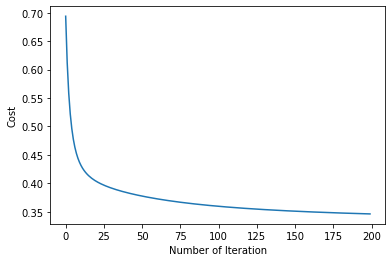

Manuel Test Accuracy: 85.25%


In [28]:
logistic_regression(X_train_T, y_train_T, X_test_T, y_test_T, 1, 200)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test) * 100

accuracies['Logistic Regression'] = acc
print('LR Accuracy: {:.2f}%'.format(acc))

LR Accuracy: 86.89%


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} KNN score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 KNN score: 77.05%


Max KNN score: 88.52%


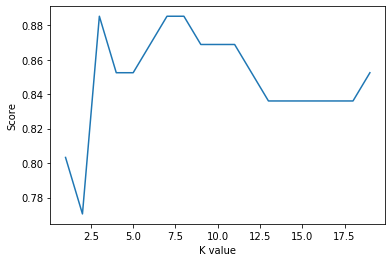

In [33]:
scoreList = []

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

plt.plot(range(1,20), scoreList)
plt.xlabel('K value')
plt.ylabel('Score')

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Max KNN score: {:.2f}%".format(acc))

In [34]:
from sklearn.svm import SVC

In [35]:
svm = SVC(random_state=1)
svm.fit(X_train, y_train)

acc = svm.score(X_test, y_test)*100
accuracies['SVM'] = acc
print("SVM accuracy: {:.2f}%".format(acc))

SVM accuracy: 88.52%


In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test, y_test)*100
accuracies['Naive Bayes'] = acc
print("NB score: {:.2f}%".format(acc))

NB score: 86.89%


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

acc = dt.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree accuracy: {:.2f}%".format(acc))

Decision Tree accuracy: 77.05%


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=1, random_state=1)
rf.fit(X_train, y_train)

acc = rf.score(X_test, y_test)*100
print("Random Forest accuracy: {:.2f}%".format(acc))

Random Forest accuracy: 81.97%


Max RF score: 88.52%


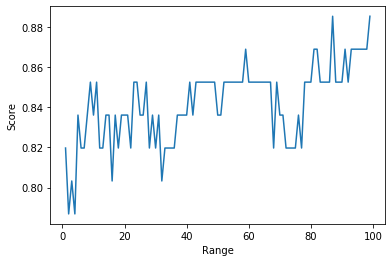

In [42]:
scoreList = []

for i in range(1,100):
    rf2 = RandomForestClassifier(n_estimators=i, random_state=1)
    rf2.fit(X_train, y_train)
    scoreList.append(rf2.score(X_test, y_test))

plt.plot(range(1,100), scoreList)
plt.xlabel('Range')
plt.ylabel('Score')

acc = max(scoreList)*100
accuracies['Random Forest'] = acc
print("Max RF score: {:.2f}%".format(acc))

Text(0, 0.5, 'Accuracy %')

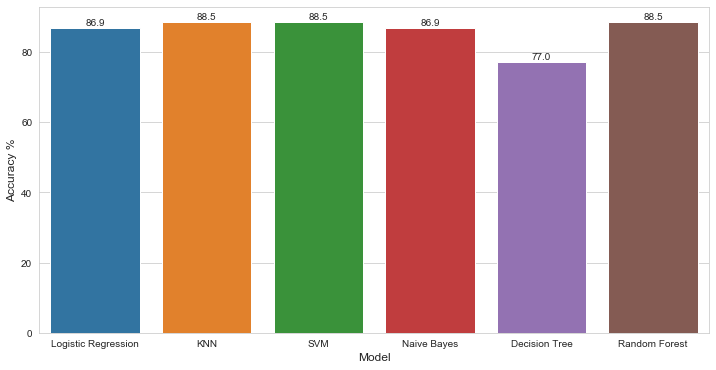

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy %", fontsize=12)